# Handwrite Detection


### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

### Step 2. Import the dataset and assign it to a variable

In [2]:
mnist = pd.read_csv('mnist_train.csv')
mnist

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 3.  If the first sample is considered as header, solve it

In [3]:
mnist = pd.read_csv('mnist_train.csv', header=None)
mnist

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Step 4. Separate labels and attributes and assign them to Y and X

In [4]:
y = mnist[0]
x = mnist.drop(0, axis=1)
x.shape, y.shape

((60000, 784), (60000,))

### Step 5.  Select 25 of the samples randomly and plot them in a 5x5 plot such that the title of each subplot is the corresponding label and hide the axes.

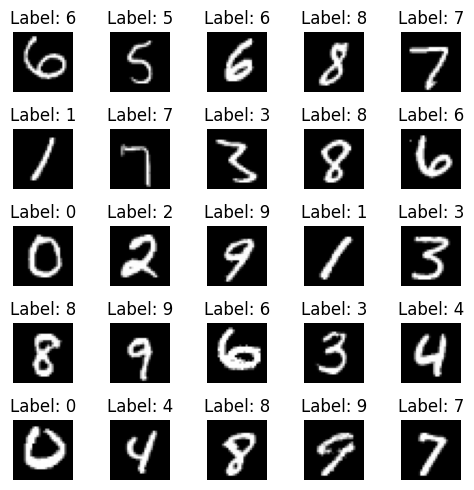

In [5]:
import matplotlib.pyplot as plt
m = x.to_numpy()
p = np.random.permutation(len(x))
p = p[:25]
plt.figure(figsize=(5, 5))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(m[p[i]].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y[p[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Step 6.  Also plot your preprocessed handwriting and compare it with the images from the previous exercise. If there is a big difference, preprocess your handwriting or the mnist dataset so that they are the same.

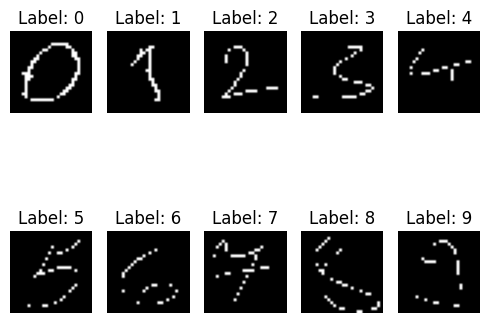

In [6]:
handwrite_num = pd.read_csv('img.csv', header=None)
x_h1 = handwrite_num.drop(784, axis=1)
y_h1 = handwrite_num[784]
y_h1 = y_h1.astype('uint8')
m1 = x_h1.to_numpy()
plt.figure(figsize=(5, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(m1[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_h1[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
img = cv2.imread('img.jpg', 0)
img = np.where(img>125,0,1).astype(np.uint8)

def SliceImg(y1, y2, x1, x2):
    Slice = img[y1:y2, x1:x2]
    kernel = np.ones((7,7),np.uint8)
    dilation = cv2.dilate(Slice,kernel,iterations = 1)
    Resize = cv2.resize(dilation, (28, 28), interpolation=cv2.INTER_LINEAR)
    plt.imshow(Resize, cmap='gray')
    plt.show()
    Flat = Resize.flatten()
    return Flat


num0 = SliceImg(370,520,70,160)
num1 = SliceImg(350,500,180,270)
num2 = SliceImg(335,485,270,400)
num3 = SliceImg(335,485,440,570)
num4 = SliceImg(320,465,610,730)
num5 = SliceImg(305,455,760,910)
num6 = SliceImg(280,430,960,1070)
num7 = SliceImg(290,440,1145,1285)
num8 = SliceImg(570,730,330,500)
num9 = SliceImg(560,720,610,760)

Numbers = np.vstack((num0, num1, num2, num3, num4, num5, num6, num7, num8, num9))
Numbers = np.hstack([Numbers,np.arange(10).reshape(-1,1)])
print(Numbers.shape)
np.savetxt('img1.csv',Numbers,delimiter=',')


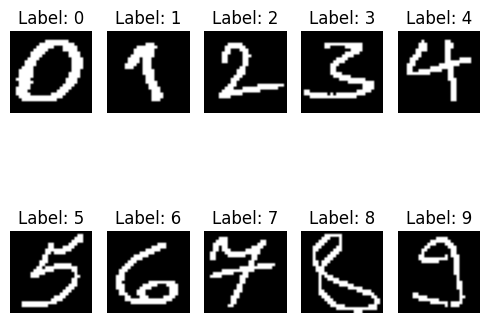

In [7]:
handwrite_num = pd.read_csv('img1.csv', header=None)
x1 = handwrite_num.drop(784, axis=1)
y1 = handwrite_num[784]
y1 = y1.astype('uint8')
m1 = x1.to_numpy()
plt.figure(figsize=(5, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(m1[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y1[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### Step 7.  Separate x and y into training and test datasets in a ratio of 80 to 20

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, stratify= y, random_state=1)

### Step 8. Create a perceptron model and train it with training dataset

In [9]:
perceptron = Perceptron(random_state=1)
perceptron.fit(x_train, y_train)
perceptron.score(x_train, y_train)

0.8637708333333334

### Step 8.  Predict x _test and assign the output to the variable y _pred

In [10]:
from sklearn.metrics import accuracy_score 

y_pred = perceptron.predict(x_test)
accuracy_score(y_test, y_pred) 

0.85725

### Step 9.  Compare y_test, which is the real labels of x_test, with the value predicted by the model, (y_pred). How many percent of the test samples have you predicted correctly?

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      1458
           1       0.97      0.93      0.95      1402
           2       0.86      0.92      0.89      1111
           3       0.94      0.70      0.80      1639
           4       0.94      0.84      0.89      1318
           5       0.42      0.96      0.59       481
           6       0.93      0.96      0.95      1147
           7       0.93      0.90      0.91      1287
           8       0.76      0.79      0.78      1134
           9       0.77      0.90      0.83      1023

    accuracy                           0.86     12000
   macro avg       0.85      0.87      0.85     12000
weighted avg       0.89      0.86      0.86     12000



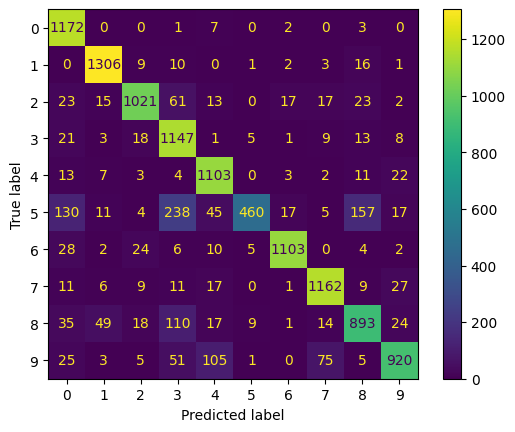

In [11]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print(classification_report(perceptron.predict(x_test), y_test))
cm = confusion_matrix(y_test, y_pred, labels=perceptron.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=perceptron.classes_)
disp.plot()
plt.show()

### Step 10.  Select 25 of the test samples randomly and plot them in a 5x5 plot such that the title of each subplot is the corresponding labels like this (true_label, test_label) and hide the axes.

### Step 11. Use the trained model to predict your own handwriting and compare the results with the results of the original dataset? What percentage of your handwriting did you predict correctly, and if the performance is different, what is the reason for this difference?

0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1

    accuracy                           0.10        10
   macro avg       0.05      0.10      0.07        10
weighted avg       0.05      0.10      0.07        10



c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MeysaM\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

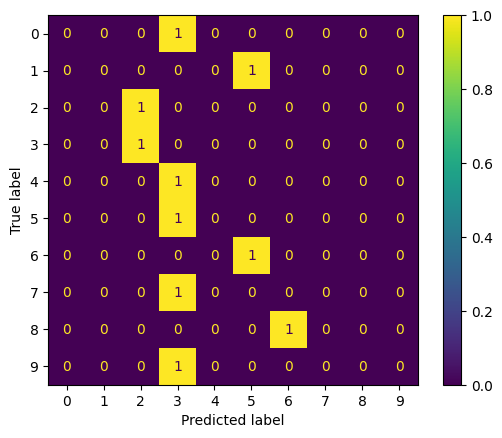

In [12]:
handwrite_predict = perceptron.predict(x1)
accuracy = accuracy_score(y1, handwrite_predict)
print(accuracy)
print(classification_report(y1, handwrite_predict))
cm = confusion_matrix(y1, handwrite_predict, labels=perceptron.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=perceptron.classes_)
disp.plot()
plt.show()

### BONUS: Create your own question and answer it.